In [20]:
from math import sin,cos,log,ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
import math

vary_v = [1.0,2.0,3.0,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5]
vary_theta = [-5.0, -3.0, -2.0, -1.0, -0.5,0.0, 0.5, 1.0,2.0,3.0,5.0]  #has to be in radians

g = 9.81
v_t = 4.9     #trim velocity
D_L = 0.2   #L/D inverse
#v0 = 5.1
#vt = 0.1
#theta0 = -.2
#tt = 0.1
x0 = 0.
y0 = 2.
#y[-1] = 0

x_max=0.
v0_max=0.
theta0_max=0

for v0 in vary_v : #use linspace or range instead to accept float and for greater range
    v0 = vary_v[i]
    #print(v0)
    
    for theta0 in range(-45,45,1):
        theta0 = theta0*math.pi/180
        
        #theta0 = vary_theta[i]
        #print(theta0)
        
        def f(u):
            v = u[0]
            theta = u[1]
            x = u[2]
            y = u[3]
            return numpy.array([-g*sin(theta)-D_L*g/v_t**2*v**2,\
                       -g*cos(theta)/v + g/v_t**2*v,\
                       v*cos(theta),\
                       v*sin(theta)])

        def euler_step(u,f,dt):
            return u+ dt*f(u)

        T = 20
        dt = 0.001
        N = int(T/dt)+1
        t = numpy.linspace(0.0, T, N)
        u = numpy.empty((N,4))
        u[0] = numpy.array([v0, theta0, x0, y0])

        for n in range (N-1):
            u[n+1] = euler_step(u[n], f, dt)
    
#%timeit euler_step
        x = u[:,2]
        y = u[:,3]
        
        x_biggest = wheremax(x)
        #add in y>0 function and change 'x' below to correct name
        if x_biggest > x_max:
            x_max=x_biggest
            v0_max=v0
            theta0_max=theta0
        
       
        

#pyplot.figure(figsize=(8,6))
#pyplot.grid(True)
#pyplot.xlabel(r'x', fontsize=18)
#pyplot.ylabel(r'y', fontsize=18)
#pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
#pyplot.plot(x,y, 'k-', lw=2);

        y_euler = y
        idx_neg_euler = numpy.where(y_euler<0.0)[0]
        if len(idx_neg_euler)==0:
            idx_ground_euler = N-1
            print("has not touched ground")
        else:
            idx_ground_euler = idx_neg_euler[0]

#print(y_euler[:21])

##Y becomes negative after the 20th element
        
#       u_x_varied = numpy.empty((N,1))
#       u_x_varied[i] = u[:,2]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Max distance = 9.495


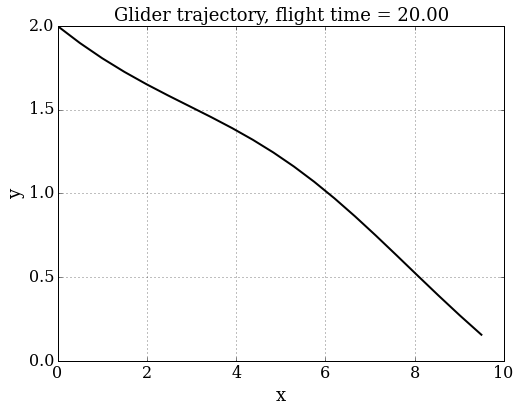

In [112]:

def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta)-D_L*g/v_t**2*v**2,\
                       -g*cos(theta)/v + g/v_t**2*v,\
                       v*cos(theta),\
                       v*sin(theta)])

def euler_step(u,f,dt):
    return u+ dt*f(u)

T = 20
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)
u = numpy.empty((N,4))
u[0] = numpy.array([v0, theta0, x0, y0])

for n in range (N-1):
    u[n+1] = euler_step(u[n], f, dt)
    
#%timeit euler_step

x = u[:,2]
y = u[:,3]

#pyplot.figure(figsize=(8,6))
#pyplot.grid(True)
#pyplot.xlabel(r'x', fontsize=18)
#pyplot.ylabel(r'y', fontsize=18)
#pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
#pyplot.plot(x,y, 'k-', lw=2);

y_euler = y
idx_neg_euler = numpy.where(y_euler<0.0)[0]
if len(idx_neg_euler)==0:
    idx_ground_euler = N-1
    print("has not touched ground")
else:
    idx_ground_euler = idx_neg_euler[0]

#print(y_euler[:21])

##Y becomes negative after the 20th element

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x[:21],y_euler[:21], 'k-', lw=2);

print('Max distance = {:.3f}'.format(x[20]))

In [4]:
?max